### 1. 딥러닝 학습 과정 실습: 2층 신경망(은닉층 1개) 직접 학습

- 구조: 입력(2) → 은닉층(4, 비선형) → 출력(1, 시그모이드)
- 학습 흐름: Forward(예측) → Loss(MSE) → Backward(미분/기울기) → Update(경사하강법)

최종 예측확률:
 [[0.056]
 [0.951]
 [0.951]
 [0.051]]
최종 예측클래스:
 [0 1 1 0]
정답:
 [0 1 1 0]
최종 Loss: 0.0026630536303743186


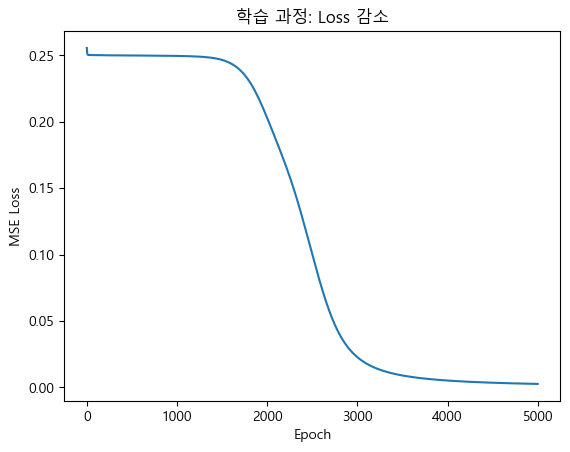

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터
X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=float)
y = np.array([[0],[1],[1],[0]], dtype=float)

# 활성화 함수(비선형)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def dsigmoid(a):
    # sigmoid(z)=a 라고 할 때 도함수: a(1-a)
    return a * (1 - a)

# (선택) 손실 함수: MSE
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

np.random.seed(42)

# 가중치 초기화
# W1: (2 -> 4), b1: (1 -> 4)
# W2: (4 -> 1), b2: (1 -> 1)
W1 = np.random.randn(2, 4) * 0.5
b1 = np.zeros((1, 4))
W2 = np.random.randn(4, 1) * 0.5
b2 = np.zeros((1, 1))

lr = 0.5
epochs = 5000
loss_history = []

for epoch in range(epochs):
    # ---- Forward ----
    z1 = X @ W1 + b1
    a1 = sigmoid(z1)          # 은닉층 비선형성
    z2 = a1 @ W2 + b2
    y_hat = sigmoid(z2)       # 출력층(확률)

    # ---- Loss ----
    loss = mse(y, y_hat)
    loss_history.append(loss)

    # ---- Backward ----
    # dL/dy_hat (MSE)
    dL_dyhat = 2 * (y_hat - y) / len(X)

    # 출력층: y_hat = sigmoid(z2)
    dyhat_dz2 = dsigmoid(y_hat)
    dL_dz2 = dL_dyhat * dyhat_dz2

    # W2, b2 기울기
    dL_dW2 = a1.T @ dL_dz2
    dL_db2 = np.sum(dL_dz2, axis=0, keepdims=True)

    # 은닉층으로 전파
    dL_da1 = dL_dz2 @ W2.T
    da1_dz1 = dsigmoid(a1)
    dL_dz1 = dL_da1 * da1_dz1

    # W1, b1 기울기
    dL_dW1 = X.T @ dL_dz1
    dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)

    # ---- Update (Gradient Descent) ----
    W2 -= lr * dL_dW2
    b2 -= lr * dL_db2
    W1 -= lr * dL_dW1
    b1 -= lr * dL_db1

# 학습 결과 확인
y_prob = y_hat
y_pred = (y_prob >= 0.5).astype(int)

print("최종 예측확률:\n", np.round(y_prob, 3))
print("최종 예측클래스:\n", y_pred.ravel())
print("정답:\n", y.ravel().astype(int))
print("최종 Loss:", loss_history[-1])

# Loss 곡선
plt.figure()
plt.plot(loss_history)
plt.title("학습 과정: Loss 감소")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()


### 2. 활성화 함수(Activation Function)

- 활성화 함수는 신경망에서 “신호를 얼마나 통과시킬지 결정하는 함수”이다.

- 왜 필요한가?
- 신경망에 비선형성(non-linearity)을 추가
- 없으면 여러 층을 쌓아도 선형 모델과 동일

<!-- - 활성화 함수(Activation Function)들을 정의하고 시각화하는 예제 코드입니다. 
- 이 코드는 대표적인 활성화 함수들인 Sigmoid, ReLU, Leaky ReLU, Tanh, Softmax 함수들을 포함합니다. -->

- 함수	      특징	        주 사용
- Sigmoid	0~1 출력	    이진 분류 출력층
- ReLU	음수 0, 양수 그대로	은닉층(가장 많이 사용)
- Tanh	-1~1                출력	일부 은닉층
- Softmax	확률 합 = 1	    다중 분류 출력층

In [ ]:
# Sigmoid: 값이 0에서 1 사이로 매끄럽게 변화합니다.
# ReLU: 음수 값을 0으로 바꾸고, 양수 값은 그대로 유지합니다.

# Leaky ReLU: ReLU와 유사하지만 음수 값에서도 작은 기울기를 가집니다.

# Tanh: 값이 -1에서 1 사이로 변합니다.

# Softmax: 여러 클래스에 대한 확률을 출력합니다.
# Softmax 결과
# Softmax 함수는 다차원 입력에서 각 클래스에 대한 확률을 계산합니다. 
# 예를 들어, 입력이 [1, 2, 3]일 때 Softmax 함수는 다음과 같은 확률을 반환합니다:
# Softmax 결과: [0.09003057 0.24472847 0.66524096]

In [1]:
import numpy as np
import matplotlib.pyplot as plt

##### 활성화 함수 정의

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def tanh(x):
    return np.tanh(x)

def softmax(x):
    e_x = np.exp(x - np.max(x))  # For numerical stability
    return e_x / e_x.sum(axis=0)

#### 입력 값 범위 설정

In [3]:
# 파이썬의 NumPy 라이브러리를 사용
# -10부터 10까지의 구간을 100개의 균등한 값으로 나눈 1차원 배열(벡터)을 생성하는 코드입니다.

# 세부 설명
# np.linspace(start, stop, num):
# linspace : linear space의 약자로, 선형적으로 균등한 간격을 가진 숫자 배열을 생성하는 함수

# np.linspace : 시작과 끝 값 사이를 정확히 지정한 개수만큼 균등하게 나눕니다.
# np.arange : 시작 값, 끝 값, 그리고 간격(step)을 지정하여 값을 생성합니다. 
# 즉, np.arange는 간격을 기준으로 값을 나누는 반면, np.linspace는 개수를 기준으로 나누는 차이가 있습니다.

# start: 배열의 시작값, 여기서는 -10.이 함수는 시작 값부터 끝 값까지 등차수열의 형태로 일정한 간격을 유지하며 주어진 개수만큼의 값을 반환합니다.
# stop: 배열의 마지막값, 여기서는 10.
# num: 시작값과 마지막값 사이에 생성할 샘플 수, 여기서는 100.



In [4]:
# np.linspace(-10, 10, 100)의 의미
# 이 함수는 -10에서 시작하여 10에서 끝나는 값을 포함하는 100개의 숫자를 균등하게 생성합니다.
# 따라서, -10과 10 사이에 있는 값들이 100개의 균일한 간격으로 분포하게 됩니다.

x = np.linspace(-10, 10, 100)

#### 활성화 함수 결과 계산¶

In [5]:
sigmoid_y = sigmoid(x)
relu_y = relu(x)
leaky_relu_y = leaky_relu(x)
tanh_y = tanh(x)

# Softmax는 다차원 입력에서 사용하므로 입력을 다차원으로 생성
softmax_input = np.array([1, 2, 3])
softmax_y = softmax(softmax_input)

#### 시각화

Softmax 결과: [0.09003057 0.24472847 0.66524096]


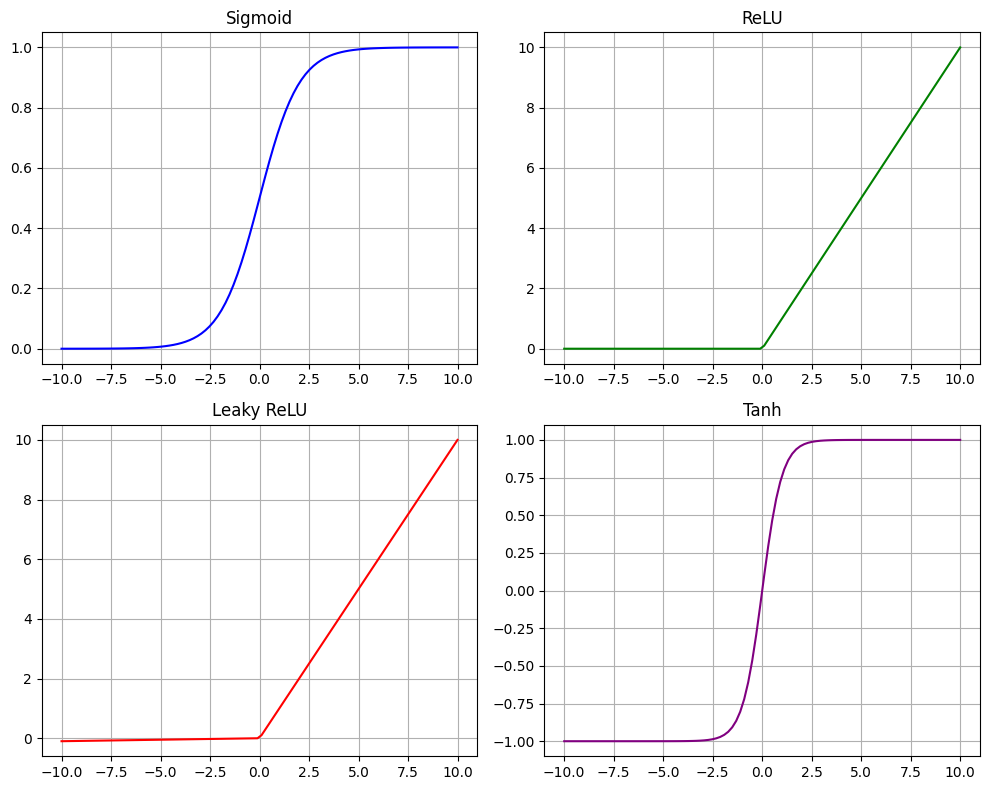

In [6]:

plt.figure(figsize=(10, 8))

# Sigmoid
plt.subplot(2, 2, 1)
plt.plot(x, sigmoid_y, label="Sigmoid", color="blue")
plt.title("Sigmoid")
plt.grid(True)

# ReLU
plt.subplot(2, 2, 2)
plt.plot(x, relu_y, label="ReLU", color="green")
plt.title("ReLU")
plt.grid(True)

# Leaky ReLU
plt.subplot(2, 2, 3)
plt.plot(x, leaky_relu_y, label="Leaky ReLU", color="red")
plt.title("Leaky ReLU")
plt.grid(True)

# Tanh
plt.subplot(2, 2, 4)
plt.plot(x, tanh_y, label="Tanh", color="purple")
plt.title("Tanh")
plt.grid(True)

# Softmax는 시각화하기 어렵기 때문에 출력값을 텍스트로 표시
print("Softmax 결과:", softmax_y)

plt.tight_layout()
plt.show()


#### ReLU 함수와 그 미분 함수

In [7]:
# 코드 설명
# ReLU 함수 정의:
# relu(x)는 입력 값 중 0보다 큰 값은 그대로 반환하고, 0 이하의 값은 0으로 반환합니다.
# 미분 함수 정의:
# relu_derivative(x)는 입력 값이 0보다 크면 1, 그렇지 않으면 0을 반환합니다.
# 그래프 시각화:
# 왼쪽 그래프는 ReLU 함수의 출력 값을 보여줍니다.
# 오른쪽 그래프는 ReLU 함수의 미분 값을 나타냅니다.

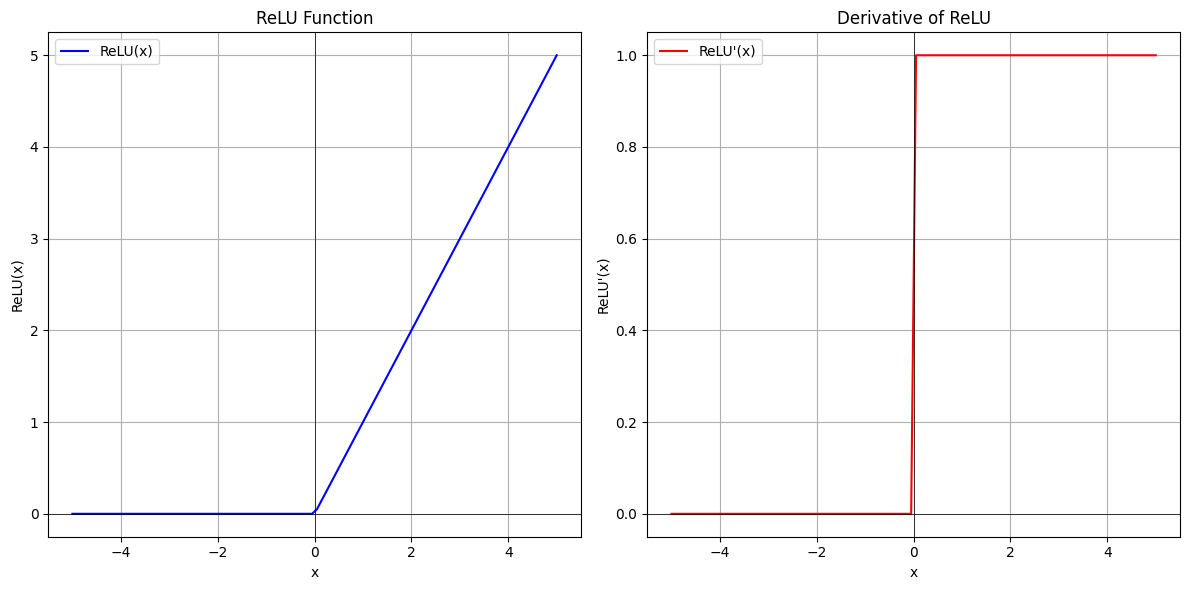

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# ReLU 함수 정의
def relu(x):
    return np.maximum(0, x)

# ReLU 함수의 미분 정의
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# x 값 범위 설정
x = np.linspace(-5, 5, 100)

# ReLU 함수와 미분 계산
y = relu(x)
y_derivative = relu_derivative(x)

# 그래프 그리기
plt.figure(figsize=(12, 6))

# ReLU 함수 그래프
plt.subplot(1, 2, 1)
plt.plot(x, y, color='blue', label='ReLU(x)')
plt.title('ReLU Function')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.grid()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()

# ReLU 함수의 미분 그래프
plt.subplot(1, 2, 2)
plt.plot(x, y_derivative, color='red', label="ReLU'(x)")
plt.title('Derivative of ReLU')
plt.xlabel('x')
plt.ylabel("ReLU'(x)")
plt.grid()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()
